In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np #numerical and array operation
import pandas as pd #data manipulation and analysis
import seaborn as sns #garphs
from matplotlib import pyplot as plt #visualization

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt #timem series analysis and forecasting
from sklearn.linear_model import LinearRegression #linear regression model

import warnings #control warning messages on code
warnings.filterwarnings('ignore') #to suppress the warning

In [3]:
df = pd.read_csv("/content/drive/MyDrive/My projects/Time Series Forecasting/gold_monthly_csv.csv") #read data set
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.shape


(847, 2)

In [5]:
print(f"Data range of gold proces available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}") #display range of dataset

Data range of gold proces available from - 1950-01 to 2020-07


In [6]:
date = pd.date_range (start = '1/1/1950', end='8/1/2020', freq='M') #create a data range and save to date
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [7]:
df['month']=date #contain the dates
df.drop('Date',axis=1,inplace=True) #removes the Date column
df=df.set_index('month') #sets the month column as the index of dataframe
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


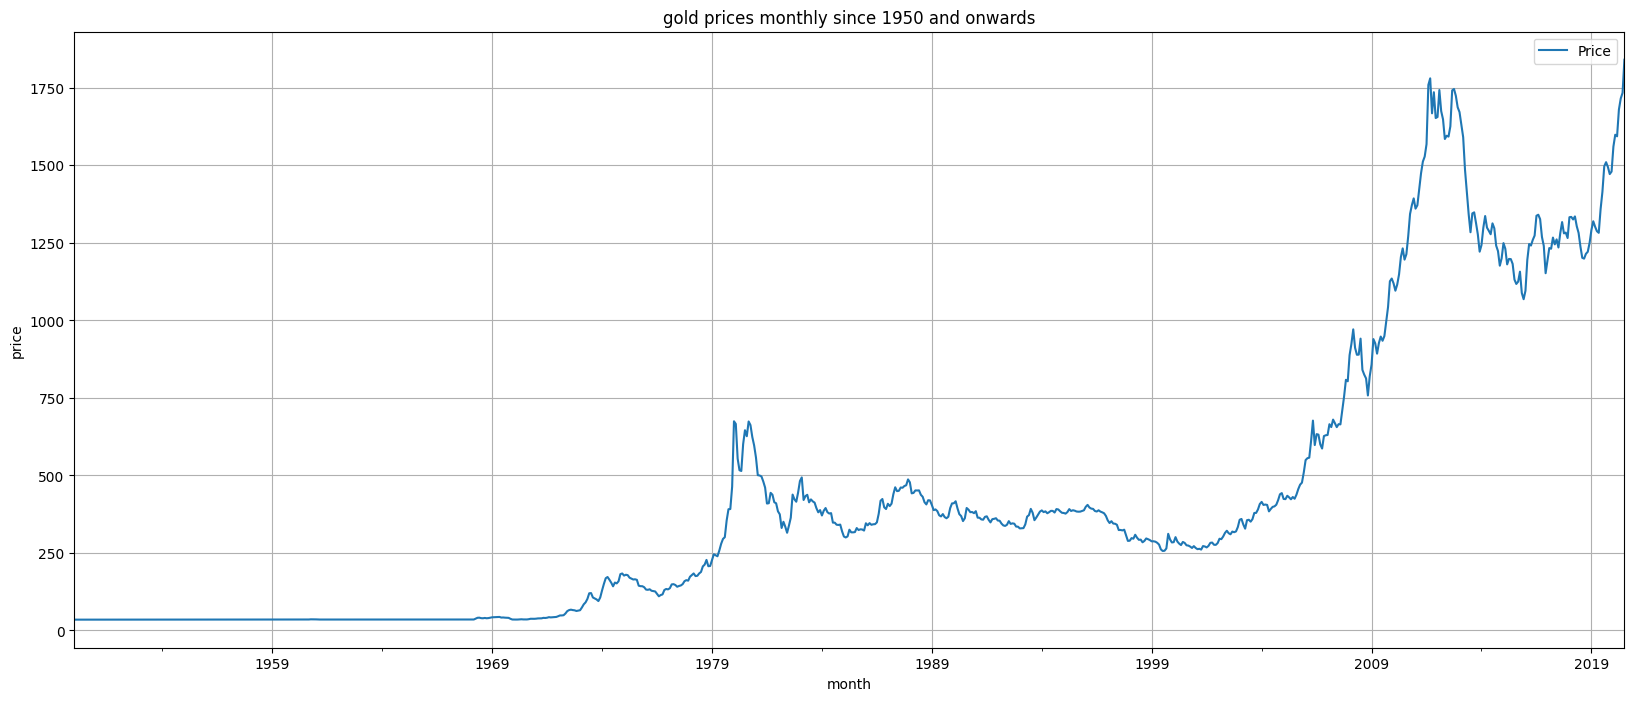

In [8]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel("month")
plt.ylabel('price')
plt.grid()

In [9]:
round(df.describe(),3) #to give summary with 3 decimal values

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


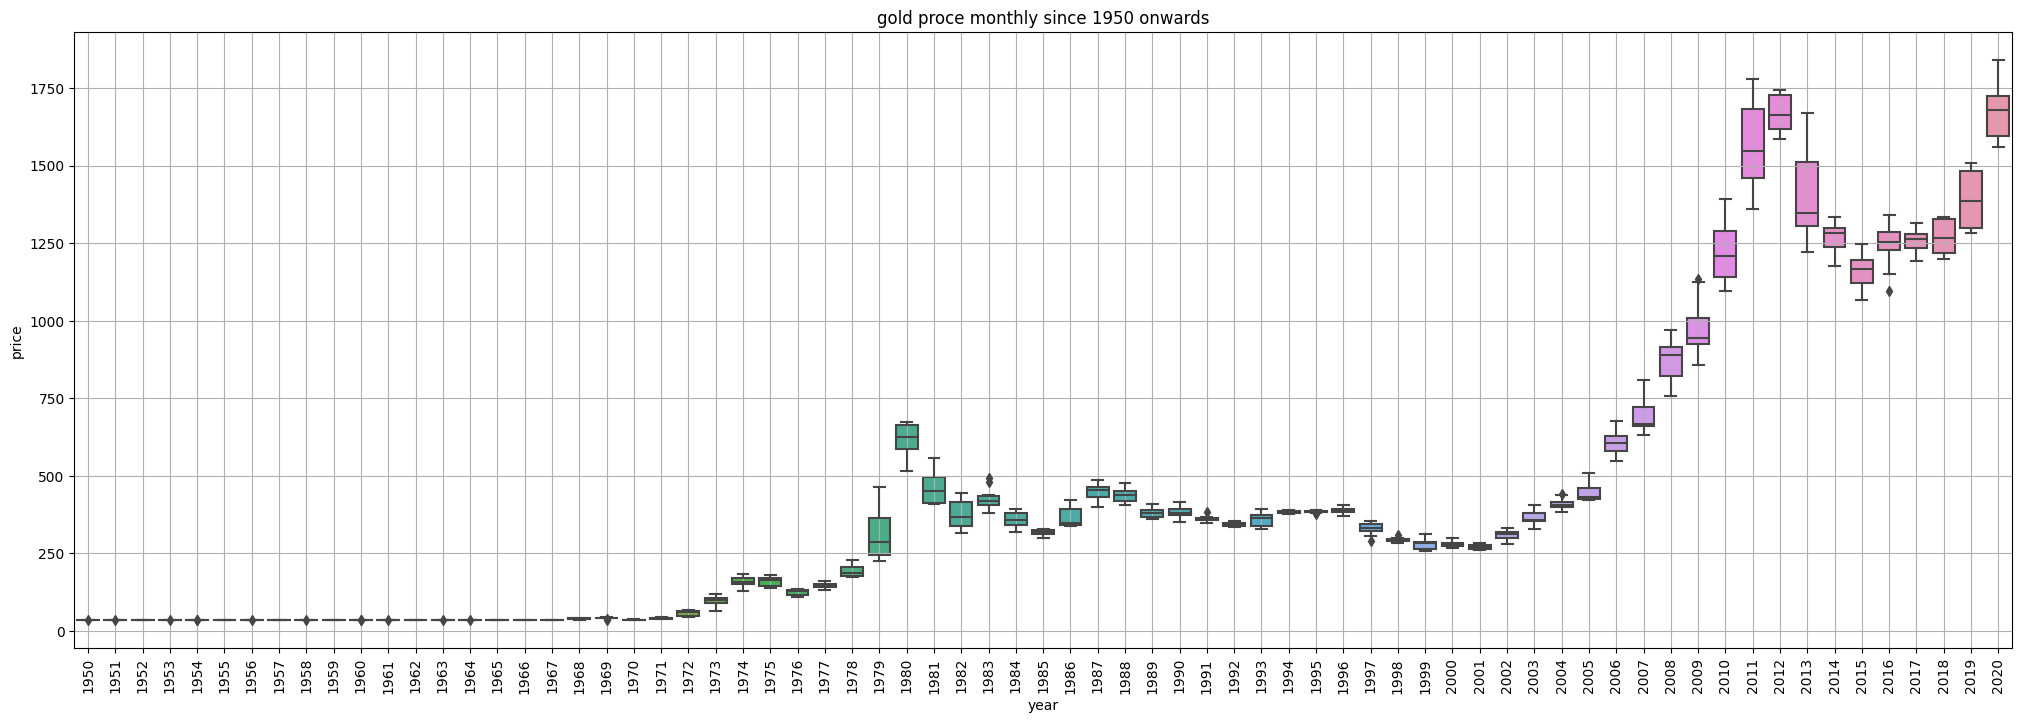

In [10]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0], ax=ax)
plt.title('gold proce monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid();

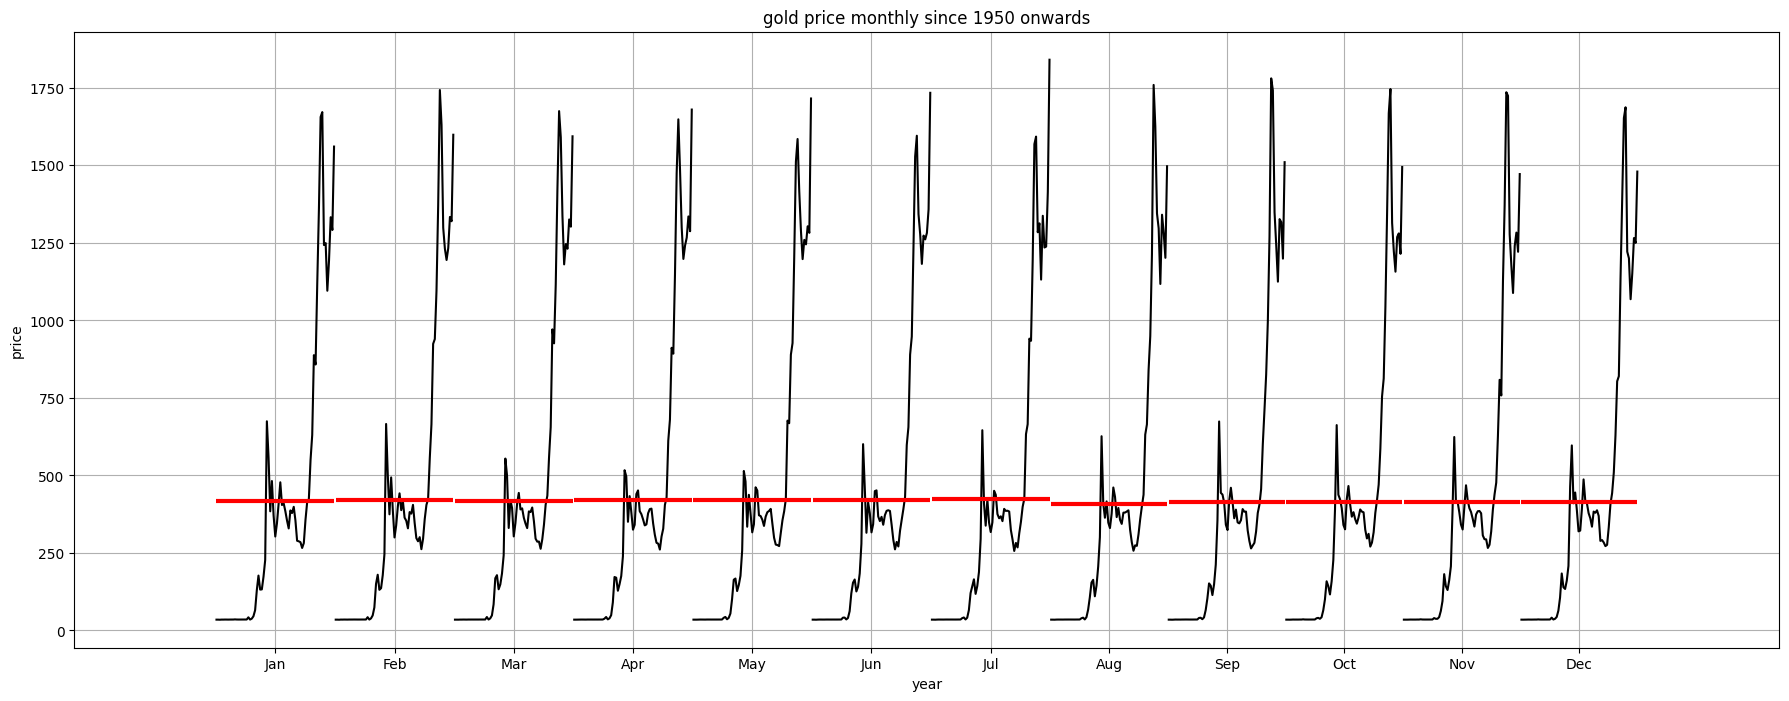

In [11]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax=plt.subplots(figsize=(22,8))
month_plot(df, ylabel='gold price', ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

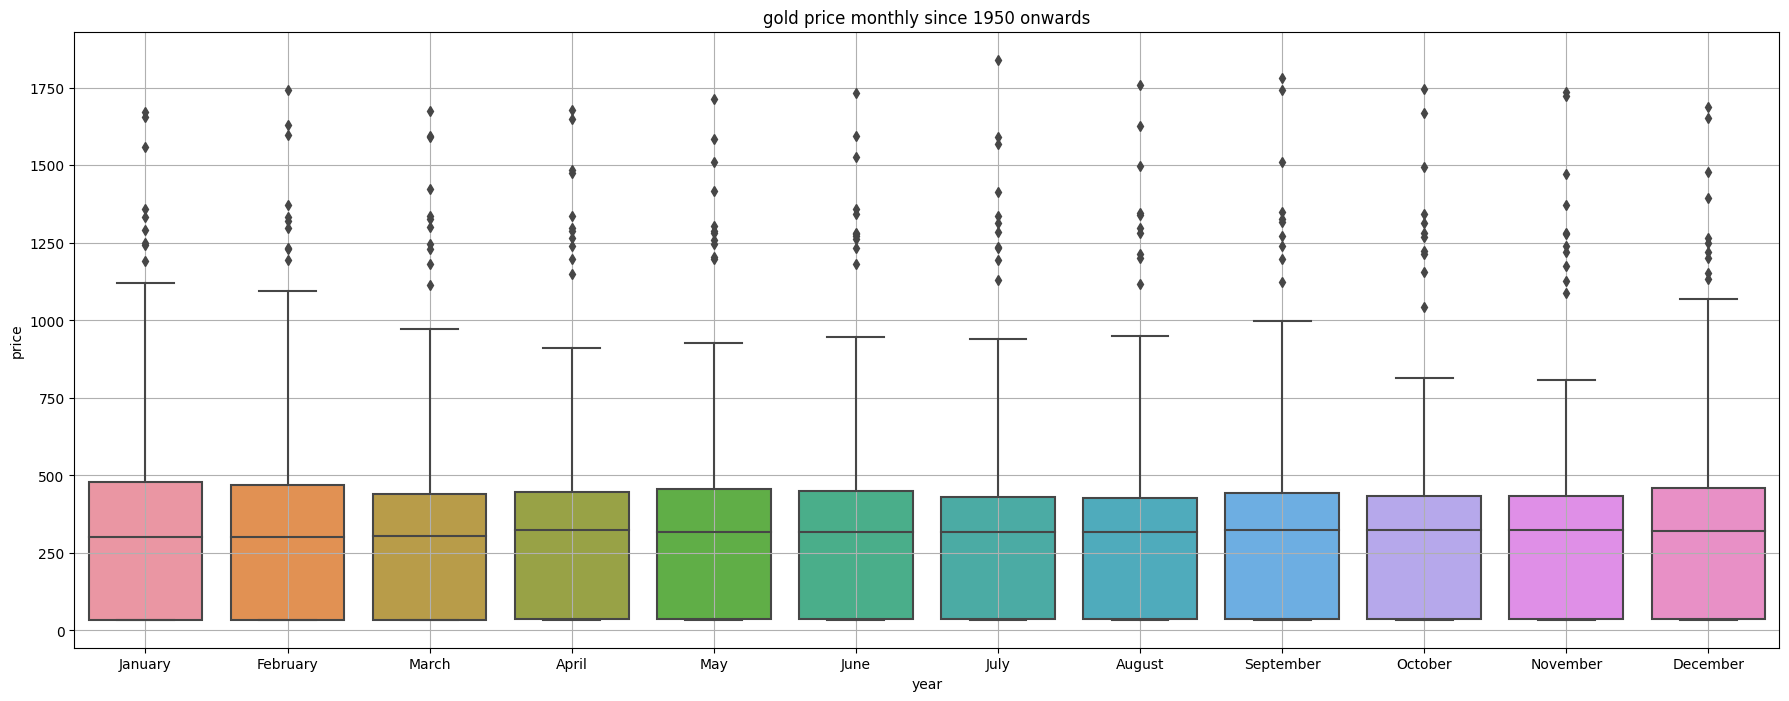

In [12]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

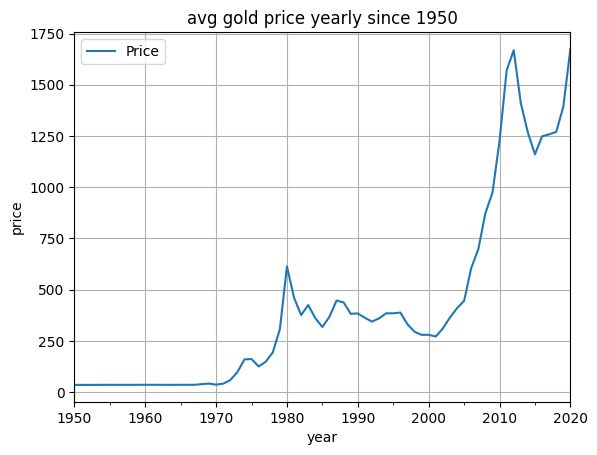

In [13]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title('avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

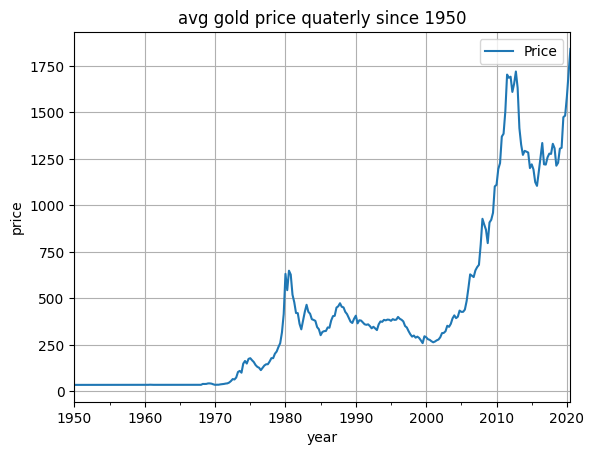

In [14]:
df_yearly_sum = df.resample('Q').mean()
df_yearly_sum.plot();
plt.title('avg gold price quaterly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

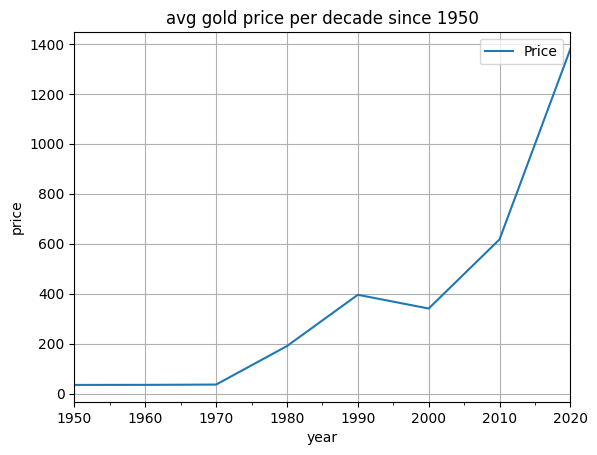

In [15]:
df_yearly_sum = df.resample('10Y').mean()
df_yearly_sum.plot();
plt.title('avg gold price per decade since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

In [16]:
#calculates mean , standard deviation and coefficient of variation percentage
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index = True, right_index = True)
df_1['Cov_pct'] = ((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


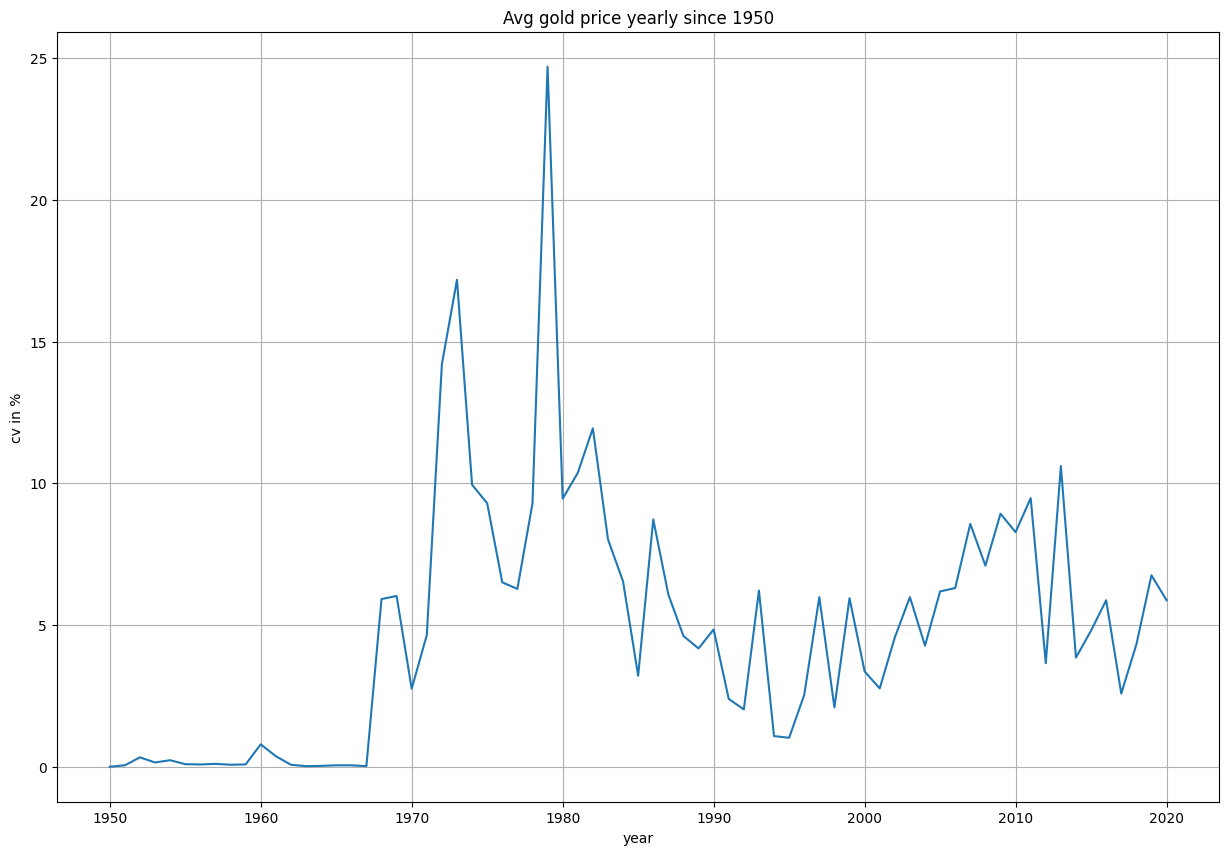

In [17]:
#to plot coefficient of variation on yearly basis
fig, ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()

In [18]:
#splits the original dataset into 2 subsets train and test
train = df[df.index.year <= 2015]
test = df[df.index.year>2015]

In [19]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


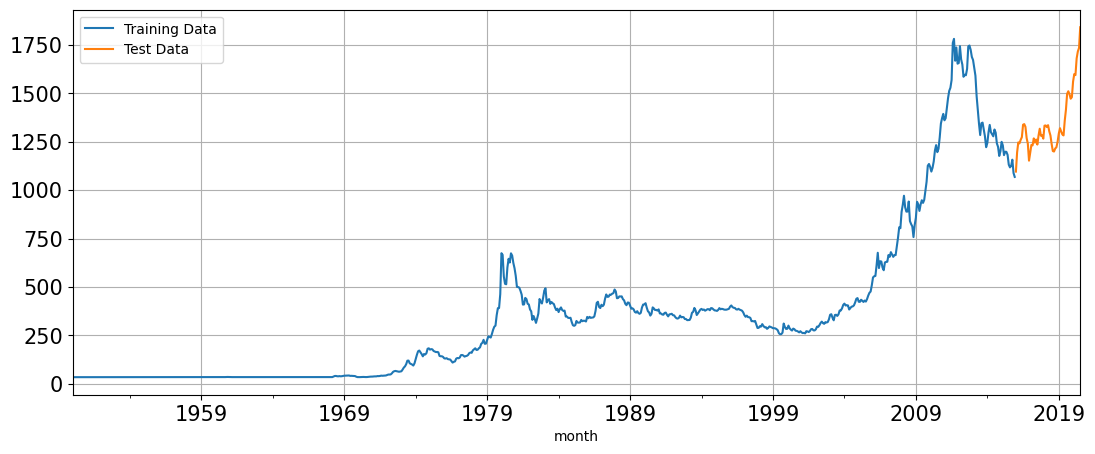

In [20]:
#create a plot that visualizes the gold prices for both the training and test data sets
train["Price"].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [21]:
#creates 2 lists to represent time indices for train and test dataset
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [22]:
#2 dataframnes LR_train and LR_test copies of train and test
LR_train = train.copy()
LR_test = test.copy()

In [23]:
#adds a new column named 'time' to both the LR_train and LR_test DataFrames,
#and populates it with the values from the train_time and test_time lists

LR_train['time']=train_time
LR_test['time']=test_time

## LINEAR REGRESSION MODEL

In [24]:
#traning a linear regression model to fit a model based on time indices and gold prices
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values) #The model will learn a linear relationship between the time indices and the gold prices in the training data.

LinearRegression()

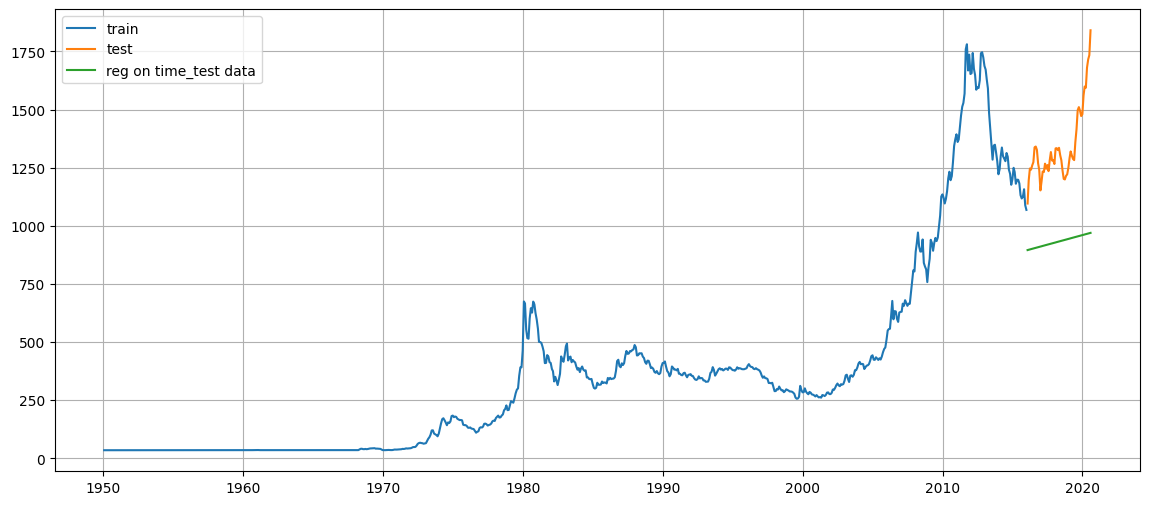

In [25]:
#using the trained linear regression model to make predictions on the test data and then plotting the actual, predicted, and training data
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14, 6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [26]:
# mape that calculates the Mean Absolute Percentage Error (MAPE) between actual and predicted values
def mape(actual, pred):
  return round((np.mean(abs(actual-pred)/ actual))*100,2)

In [27]:
# calculates the Mean Absolute Percentage Error (MAPE) for a model's predictions on the test data and then prints the result
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [28]:
#results to store the Mean Absolute Percentage Error (MAPE) results for the regression model on the test data
results = pd.DataFrame({'Test Mape (%)' : [mape_model1_test]}, index=['Linear Regression Model'])
results

,Test Mape (%)
Linear Regression Model,29.76


## NAIVE MODEL

In [29]:
#two new DataFrames, Naive_train and Naive_test, which are copies of the original train and test DataFrames,for naive forecasting model
Naive_train = train.copy()
Naive_test = test.copy()

In [30]:
#adds a new column named 'naive' to the Naive_test DataFrame and assigns a constant value to it.
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

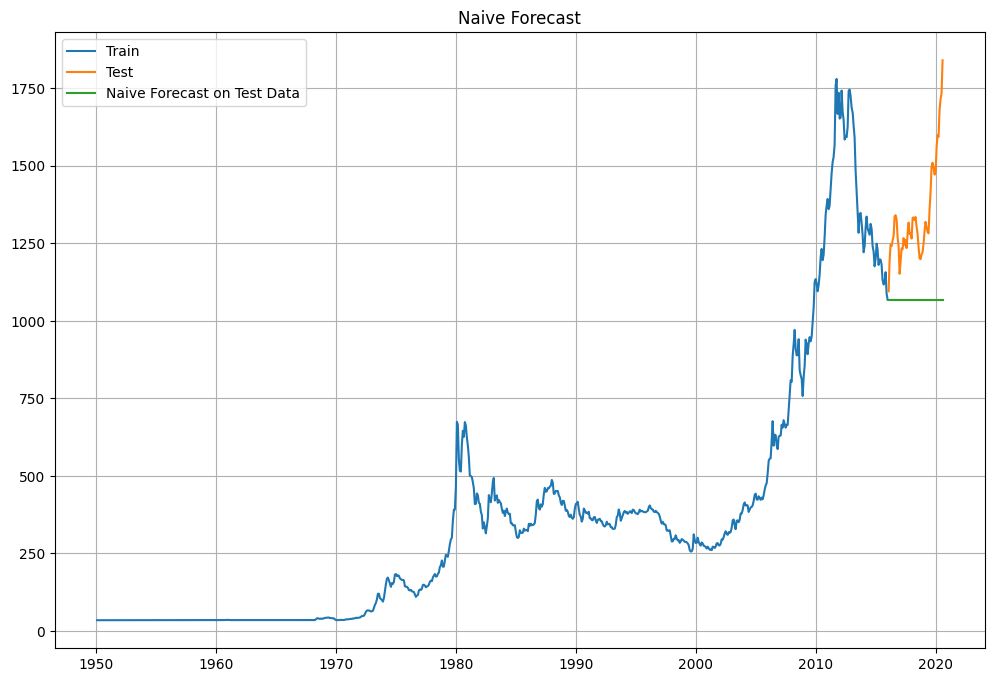

In [31]:
#create a plot that visualizes the actual gold prices for the training and test data, as well as the forecasted values using the naive forecasting method
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(Naive_test['naive'],label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [32]:
#calculates the Mean Absolute Percentage Error (MAPE) for the naive forecast on the test data
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)
print("For Niave forecast on the Test Data, MAPE is %3.3f" %(mape_model2_test), "%")

For Niave forecast on the Test Data, MAPE is 19.380 %


In [33]:
# resultsDF_2, to store the Mean Absolute Percentage Error (MAPE) results for the naive forecasting model on the test data. It then concatenates this new DataFrame with the previously created results DataFrame to include the naive model's MAPE results.
resultsDF_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]},index=['NaiveModel'])
results=pd.concat([results,resultsDF_2])
results

,Test Mape (%),Test MAPE (%)
Linear Regression Model,29.76,NaN
NaiveModel,NaN,19.38


## EXPONENTIAL SMOOTHING MODEL

In [34]:
#fitting an Exponential Smoothing model to the time series data using the ExponentialSmoothing class from the statsmodels
final_model = ExponentialSmoothing(df,
                                   trend = 'additive',
                                   seasonal = 'additive').fit(smoothing_level = 0.4,
                                                              smoothing_trend = 0.3,
                                                              smoothing_seasonal = 0.6)

In [35]:
#calculates the Mean Absolute Percentage Error (MAPE) for the final Exponential Smoothing model by comparing the fitted values to the actual values
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [36]:
#using the fitted Exponential Smoothing model (final_model) to make forecasts for future time periods
prediction = final_model.forecast(steps=len(test))

In [37]:
#pred_df that includes forecasted values, lower confidence intervals, and upper confidence intervals for the Exponential Smoothing model's predictions
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':prediction,
                        'upper_CI': prediction + 1.96*np.std(final_model.resid,ddof = 1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


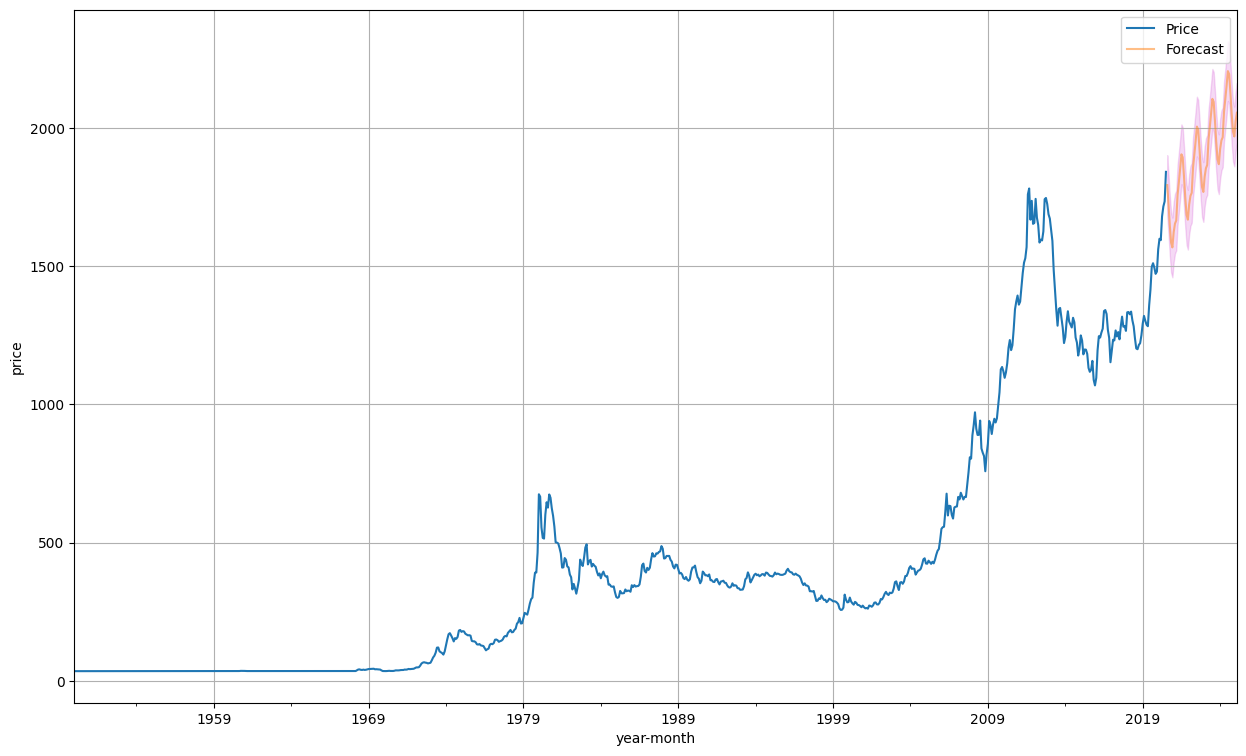

In [38]:
# time series plot to visualize the actual gold prices, forecasted values, and their associated confidence intervals
axis = df.plot(label = 'Actual', figsize=(15,9))
pred_df['prediction'].plot(ax= axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [39]:

# Calculate MAPE for Exponential Smoothing model
mape_final_model = round((np.mean(abs(df['Price'] - final_model.fittedvalues) / df['Price'])) * 100, 2)

print("MAPE for Exponential Smoothing Model:", mape_final_model, "%")


MAPE for Exponential Smoothing Model: 17.24 %


## MAPE COMPARISION

In [42]:
# combining the mape of all 3 models
results = pd.DataFrame(columns=['Model', 'Test MAPE (%)'])
results = results.append({'Model': 'Linear Regression Model', 'Test MAPE (%)': mape_model1_test}, ignore_index=True)
results = results.append({'Model': 'Naive Model', 'Test MAPE (%)': mape_model2_test}, ignore_index=True)
results = results.append({'Model': 'Exponential Smoothing Model', 'Test MAPE (%)': mape_final_model}, ignore_index=True)

results


,Model,Test MAPE (%)
0,Linear Regression Model,29.76
1,Naive Model,19.38
2,Exponential Smoothing Model,17.24


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Linear Regression Model
mse_lr = round(mean_squared_error(test['Price'], test_predictions_model1))
rmse_lr = round(math.sqrt(mse_lr))
mae_lr = round(mean_absolute_error(test['Price'], test_predictions_model1))
r2_lr = round(r2_score(test['Price'], test_predictions_model1))

# Naive Model
mse_naive = round(mean_squared_error(test['Price'], Naive_test['naive'].values))
rmse_naive = round(math.sqrt(mse_naive))
mae_naive = round(mean_absolute_error(test['Price'], Naive_test['naive'].values))
r2_naive = round(r2_score(test['Price'], Naive_test['naive'].values))

# Exponential Smoothing Model
mse_exponential = round(mean_squared_error(df['Price'], final_model.fittedvalues))
rmse_exponential = round(math.sqrt(mse_exponential))
mae_exponential = round(mean_absolute_error(df['Price'], final_model.fittedvalues))
r2_exponential = round(r2_score(df['Price'], final_model.fittedvalues))

# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression Model', 'Naive Model', 'Exponential Smoothing Model'],
    'MSE': [mse_lr, mse_naive, mse_exponential],
    'RMSE': [rmse_lr, rmse_naive, rmse_exponential],
    'MAE': [mae_lr, mae_naive, mae_exponential],
    'R-squared': [r2_lr, r2_naive, r2_exponential]
})

metrics_df


,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression Model,186157,431,408,-7
1,Naive Model,98242,313,273,-3
2,Exponential Smoothing Model,3041,55,38,1
